In [1]:
import torch
from resnext50 import resnext50
from dataset import TestImageDataset
from dataset import VisualDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]


from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

def calcula_pred(red, dataset, batch_size=100):
    # base = []
    predicciones = []
    dataloader = DataLoader(dataset, batch_size)
    for x, lab in tqdm(dataloader):
        out = red.forward(x)
        _, max_idx = torch.max(out, dim=1)
        predicciones.append(max_idx)
    return predicciones

In [2]:
net = resnext50(img_channel=3, num_classes=19)
net.load_state_dict(torch.load(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Trained\best_ResNext.pth'))
net.eval()

ResNext(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BottleneckBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (residual): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, ep

In [3]:
test_dataset = TestImageDataset(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224, process=True)

In [4]:
pr = calcula_pred(red=net, dataset=test_dataset, batch_size=32)

predictions = [j for i in pr for j in i]

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [05:06<00:00,  5.10s/it]


In [5]:
vis_dataset = VisualDataset(r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224, process=False)

In [6]:
len(vis_dataset)

1900

In [5]:
len(predictions)

1900

In [7]:
ground_truth = []
for i in range(len(predictions)):
    ground_truth.append(test_dataset[i][1])

In [8]:
confusion_matrix(ground_truth, predictions)

array([[77,  1,  0, 14,  0,  0,  2,  2,  0,  1,  1,  0,  0,  0,  1,  0,
         0,  0,  1],
       [ 1, 53, 11,  3,  1,  4,  0,  1,  2,  0, 10,  1,  5,  0,  1,  7,
         0,  0,  0],
       [ 1,  5, 64,  0,  1,  4,  5,  0,  1,  0,  0,  6,  2,  0,  0,  9,
         2,  0,  0],
       [ 5,  1,  0, 71,  6,  4,  0,  0,  2,  2,  1,  1,  2,  0,  2,  0,
         0,  0,  3],
       [ 1,  2,  0,  3, 63,  4,  4,  1,  1,  0,  0,  3,  2,  0, 13,  3,
         0,  0,  0],
       [ 3,  8,  9,  5,  7, 40, 10,  0,  0,  1,  1,  6,  2,  0,  1,  5,
         0,  1,  1],
       [ 1,  3,  6,  4,  5, 16, 52,  0,  3,  2,  0,  4,  1,  0,  1,  1,
         0,  1,  0],
       [ 5,  0,  1,  1,  1,  1,  0, 73,  9,  1,  0,  0,  1,  0,  2,  0,
         1,  0,  4],
       [ 1,  0,  0,  1,  0,  0,  0,  2, 87,  1,  0,  1,  1,  4,  0,  0,
         1,  0,  1],
       [ 2,  0,  0,  1,  0,  0,  2,  1,  1, 86,  0,  0,  5,  0,  1,  0,
         0,  0,  1],
       [ 0, 16, 21,  0,  7,  3,  1,  0,  3,  0, 36,  2,  5,  0,  1,  4

In [10]:
data=[]
for i in range(len(predictions)):
    data.append([predictions[i].item(), ground_truth[i]])


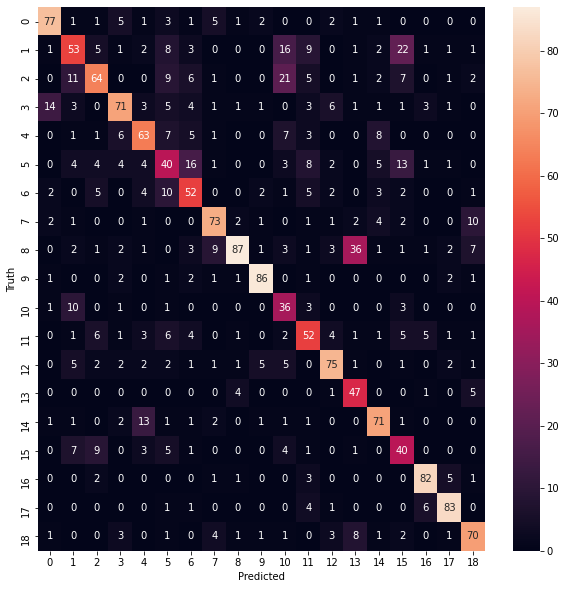

<Figure size 1080x1080 with 0 Axes>

In [11]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

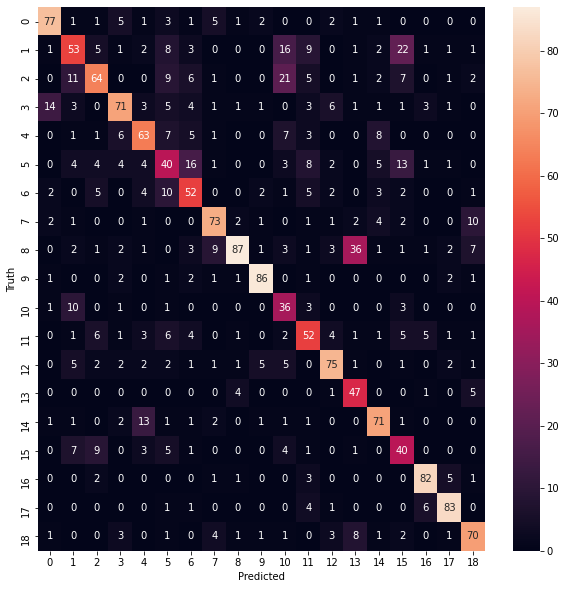

<Figure size 1080x1080 with 0 Axes>

In [9]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

In [9]:
wrong=[]
cont= 0
for i in range(len(predictions)):
    boolean = predictions[i].item()==ground_truth[i]

    if boolean == False:
        wrong.append(i)
    else:
        cont += 1
    



In [10]:
cont/1900 *100

64.31578947368422

In [15]:
wrong_class0 = []
cont0 = 0
for i in range(len(predictions)):
    if ground_truth[i] == 0 and predictions[i] == 0:
        cont0 += 1
    elif ground_truth[i] == 0 and predictions[i] != 0:
        wrong_class0.append(i)
        

In [11]:
def contar_veces(elemento, lista):
    veces = 0
    for i in lista:
        if elemento == i:
            veces += 1
    return veces

In [12]:
def classes_wrong(pred,truth):
    errores = []
    accuracies = []
    for i in range(19):
        err = []
        contador = 0
        for j in range(len(predictions)):
            if ground_truth[j] == i and predictions[j] == i:
                contador += 1
            elif ground_truth[j] == i and predictions[j] != i:
                err.append(j)
        accuracies.append(contador / contar_veces(i, ground_truth))
        errores.append(err)
    return errores,accuracies

In [13]:
err, acc = classes_wrong(predictions,ground_truth)

In [14]:
acc

[0.77,
 0.53,
 0.64,
 0.71,
 0.63,
 0.4,
 0.52,
 0.73,
 0.87,
 0.86,
 0.36,
 0.52,
 0.75,
 0.47,
 0.71,
 0.4,
 0.82,
 0.83,
 0.7]

In [33]:
test_dataset.read_mapping()

{0: 'shorts',
 1: 'jackets_parka',
 2: 'sweater',
 3: 'skirts',
 4: 'dress',
 5: 'blouse_shirts',
 6: 'tee',
 7: 'pants',
 8: 'shoes',
 9: 'belt',
 10: 'coat',
 11: 'scarf',
 12: 'bag',
 13: 'socks',
 14: 'jumper',
 15: 'blazer',
 16: 'hat',
 17: 'glasses',
 18: 'tights'}

## Casos Buenos

In [26]:
err[8]#shoes

[72, 298, 445, 562, 644, 646, 844, 1058, 1324, 1431, 1442, 1543, 1614]

In [42]:
c8 = np.swapaxes(vis_dataset[72][0], 0,2)
c81 = np.swapaxes(vis_dataset[298][0], 0,2)
c82 = np.swapaxes(vis_dataset[445][0], 0,2)
c83 = np.swapaxes(vis_dataset[562][0], 0,2)


Text(0.5, 1.0, 'Predicted: socks')

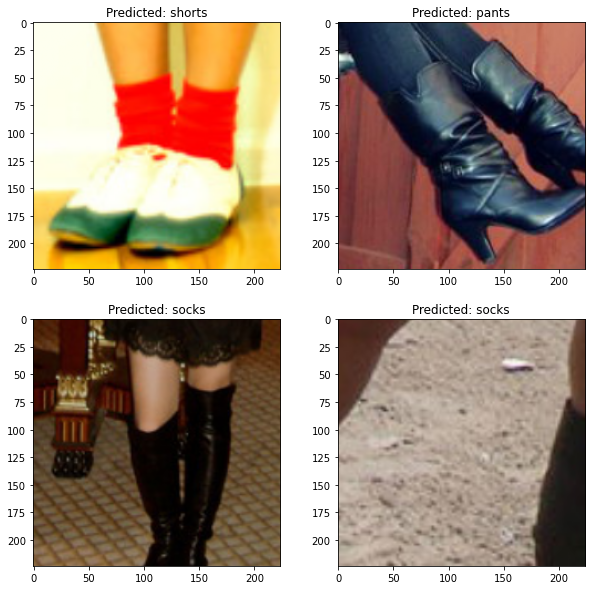

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(c8)
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[72].item()]))
axs[0, 1].imshow(c81)
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[298].item()]))
axs[1, 0].imshow(c82)
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[445].item()]))
axs[1, 1].imshow(c83)
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[562].item()]))

## Casos Malos


In [17]:
err[10][:5]#coat

[40, 89, 119, 138, 141]

In [20]:
c10 = np.swapaxes(vis_dataset[40][0], 0,2)
c101 = np.swapaxes(vis_dataset[141][0], 0,2)
c102 = np.swapaxes(vis_dataset[119][0], 0,2)
c103 = np.swapaxes(vis_dataset[138][0], 0,2)

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(c10)
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[40].item()]))
axs[0, 1].imshow(c101)
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[141].item()]))
axs[1, 0].imshow(c102)
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[119].item()]))
axs[1, 1].imshow(c103)
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[138].item()]))


Text(0.5, 1.0, 'Predicted: sweater')

Text(0.5, 1.0, 'Predicted: shoes')

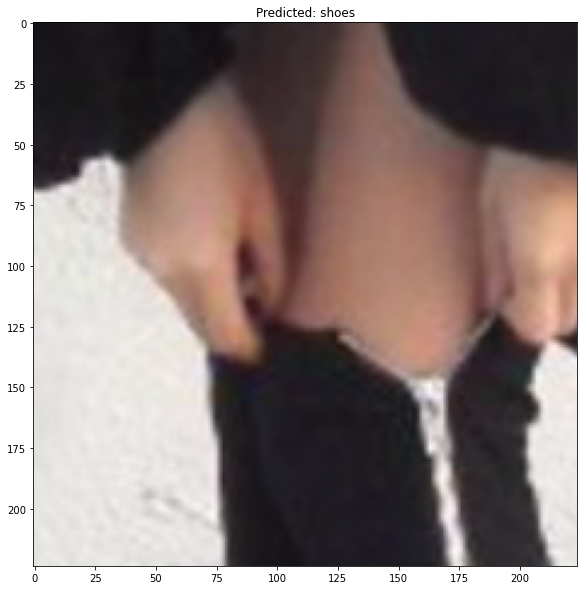

In [24]:
plt.imshow(np.swapaxes(vis_dataset[89][0], 0,2))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[89].item()]))

In [48]:
err[15][:5]#blazer

[2, 3, 17, 21, 32]

In [17]:
c15 = np.swapaxes(vis_dataset[2][0], 0,2)
c151 = np.swapaxes(vis_dataset[3][0], 0,2)
c152 = np.swapaxes(vis_dataset[17][0], 0,2)
c153 = np.swapaxes(vis_dataset[21][0], 0,2)

Text(0.5, 1.0, 'Predicted: jackets_parka')

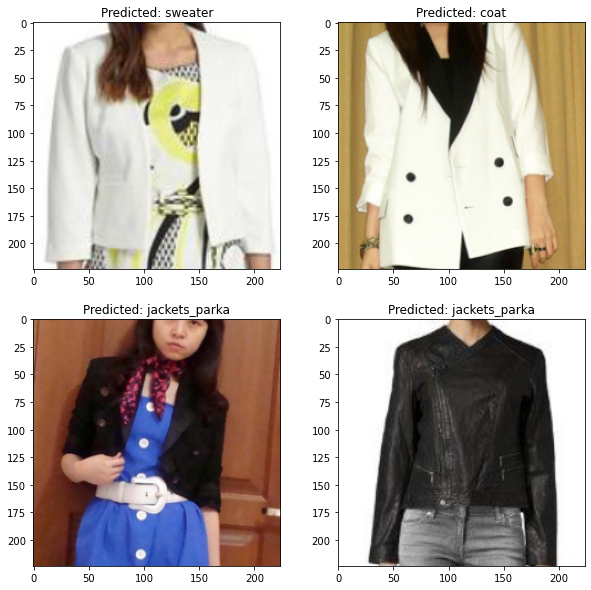

In [18]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(c15)
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[2].item()]))
axs[0, 1].imshow(c151)
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[3].item()]))
axs[1, 0].imshow(c152)
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[17].item()]))
axs[1, 1].imshow(c153)
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[21].item()]))

In [51]:
err[5][:5]#blouse_shirts

[45, 120, 228, 237, 283]

In [25]:
c5 = np.swapaxes(vis_dataset[45][0], 0,2)
c51 = np.swapaxes(vis_dataset[120][0], 0,2)
c52 = np.swapaxes(vis_dataset[283][0], 0,2)
c53 = np.swapaxes(vis_dataset[237][0], 0,2)

Text(0.5, 1.0, 'Predicted: blazer')

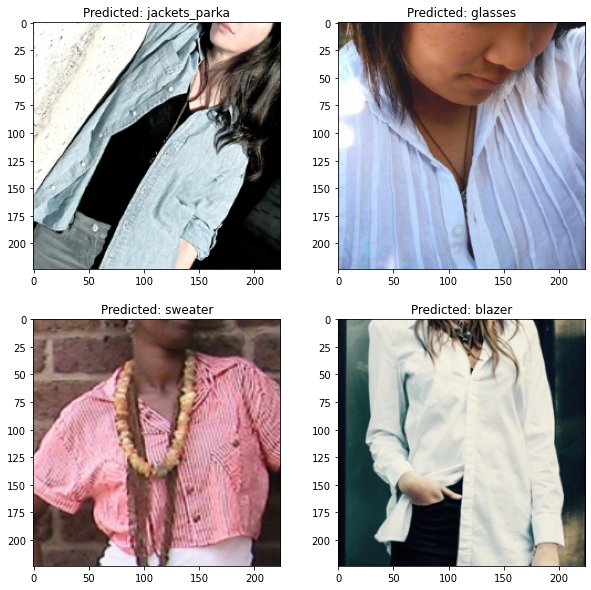

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(c5)
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[45].item()]))
axs[0, 1].imshow(c51)
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[120].item()]))
axs[1, 0].imshow(c52)
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[283].item()]))
axs[1, 1].imshow(c53)
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[237].item()]))

In [38]:
err[13][:7]#socks

[27, 68, 133, 157, 178, 194, 199]

In [21]:
c13 = np.swapaxes(vis_dataset[27][0], 0,2)
c131 = np.swapaxes(vis_dataset[68][0], 0,2)
c132 = np.swapaxes(vis_dataset[133][0], 0,2)
c133 = np.swapaxes(vis_dataset[157][0], 0,2)

Text(0.5, 1.0, 'Predicted: shoes')

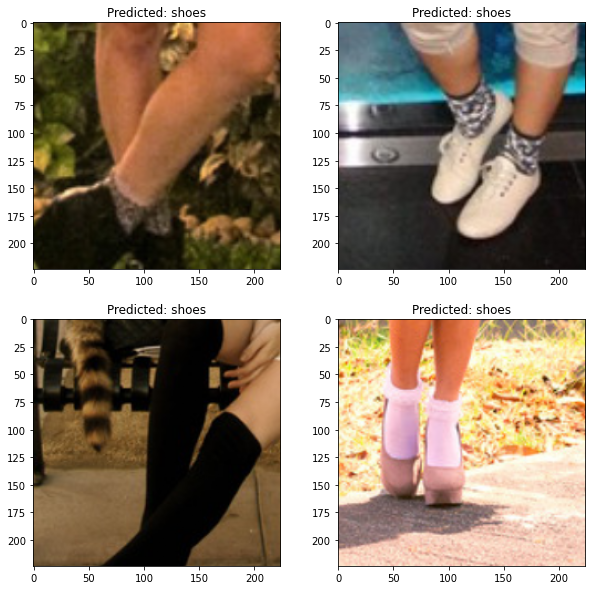

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(c13)
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[27].item()]))
axs[0, 1].imshow(c131)
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[68].item()]))
axs[1, 0].imshow(c132)
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[133].item()]))
axs[1, 1].imshow(c133)
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[157].item()]))

Text(0.5, 1.0, 'Predicted: scarf')

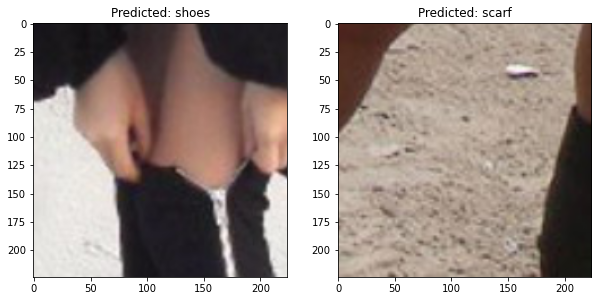

In [50]:
cc = np.swapaxes(vis_dataset[89][0], 0,2)

fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.imshow(cc)
ax1.set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[89].item()]))
ax2.imshow(c83)
ax2.set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[83].item()]))


Text(0.5, 1.0, 'Predicted: belt')

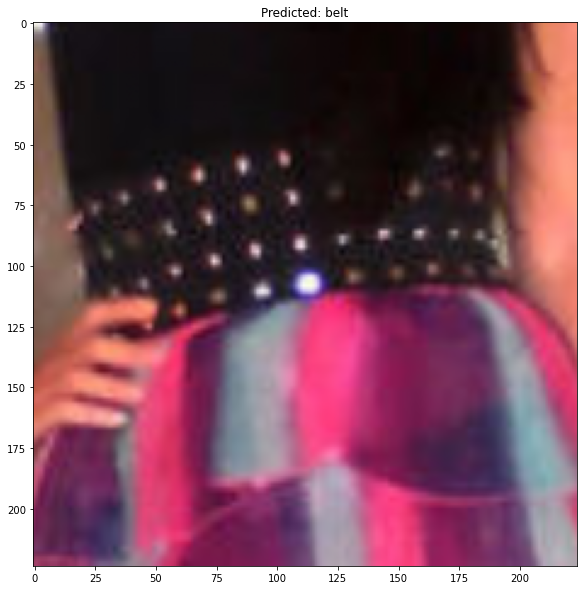

In [89]:
plt.imshow(np.swapaxes(vis_dataset[827][0],0,2))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[827].item()]))

# Casos buenardos

In [ ]:
#d = TestImageDataset(r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224, process=True)
idx_img = 0
sample_input = test_dataset[idx_img][0].unsqueeze(0)

In [76]:
class X:
    def __init__(self, path: str):
        self.softmax = torch.nn.Softmax(dim=1)
        self.model = resnext50()
        self.model.load_state_dict(torch.load(path))
        self.model.eval()
        self.threshold = 0.99
        
    def __call__(self, input_img):
        logits = self.model(input_img)
        probs = self.softmax(logits)
        max_confidence = torch.max(probs).detach().cpu().numpy()
        if max_confidence > self.threshold:
            return True, max_confidence
        return False, 0

In [77]:
x = X(r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Trained\best_ResNext.pth')

In [78]:
for i in tqdm(range(len(test_dataset))):
    img = test_dataset[i][0].unsqueeze(0)
    p, q = x(img)
    if p:
        print(f"Image number {i} was predicted with a confidence of {q:.2f}")

  0%|▎                                                                                | 7/1900 [00:01<08:23,  3.76it/s]

Image number 6 was predicted with a confidence of 0.99


  1%|▊                                                                               | 19/1900 [00:05<08:01,  3.90it/s]

Image number 18 was predicted with a confidence of 0.99


  1%|▊                                                                               | 20/1900 [00:05<07:51,  3.98it/s]

Image number 19 was predicted with a confidence of 1.00


  2%|█▎                                                                              | 30/1900 [00:07<07:50,  3.98it/s]

Image number 29 was predicted with a confidence of 0.99


  3%|██                                                                              | 49/1900 [00:12<07:54,  3.90it/s]

Image number 48 was predicted with a confidence of 1.00


  3%|██▍                                                                             | 57/1900 [00:14<07:17,  4.21it/s]

Image number 56 was predicted with a confidence of 1.00


  3%|██▌                                                                             | 62/1900 [00:15<07:05,  4.32it/s]

Image number 61 was predicted with a confidence of 1.00


  3%|██▋                                                                             | 64/1900 [00:16<07:30,  4.07it/s]

Image number 63 was predicted with a confidence of 1.00


  3%|██▊                                                                             | 66/1900 [00:16<07:30,  4.08it/s]

Image number 65 was predicted with a confidence of 1.00


  4%|███▏                                                                            | 76/1900 [00:19<07:20,  4.14it/s]

Image number 75 was predicted with a confidence of 1.00


  4%|███▎                                                                            | 80/1900 [00:20<07:21,  4.12it/s]

Image number 79 was predicted with a confidence of 1.00


  5%|███▊                                                                            | 91/1900 [00:23<08:23,  3.59it/s]

Image number 90 was predicted with a confidence of 1.00


  5%|████                                                                            | 95/1900 [00:24<08:05,  3.72it/s]

Image number 94 was predicted with a confidence of 1.00


  6%|████▍                                                                          | 106/1900 [00:26<07:30,  3.98it/s]

Image number 105 was predicted with a confidence of 1.00


  6%|████▌                                                                          | 109/1900 [00:27<07:25,  4.02it/s]

Image number 108 was predicted with a confidence of 1.00


  6%|████▋                                                                          | 112/1900 [00:28<07:25,  4.01it/s]

Image number 111 was predicted with a confidence of 1.00


  6%|████▊                                                                          | 116/1900 [00:29<07:51,  3.79it/s]

Image number 115 was predicted with a confidence of 1.00


  6%|████▊                                                                          | 117/1900 [00:29<07:43,  3.84it/s]

Image number 116 was predicted with a confidence of 1.00


  6%|████▉                                                                          | 118/1900 [00:29<07:39,  3.88it/s]

Image number 117 was predicted with a confidence of 1.00


  7%|█████▏                                                                         | 124/1900 [00:31<07:02,  4.20it/s]

Image number 123 was predicted with a confidence of 1.00


  7%|█████▎                                                                         | 127/1900 [00:32<07:09,  4.13it/s]

Image number 126 was predicted with a confidence of 1.00


  7%|█████▎                                                                         | 129/1900 [00:32<07:04,  4.17it/s]

Image number 128 was predicted with a confidence of 1.00


  7%|█████▍                                                                         | 130/1900 [00:32<07:02,  4.19it/s]

Image number 129 was predicted with a confidence of 1.00


  7%|█████▍                                                                         | 132/1900 [00:33<06:55,  4.26it/s]

Image number 131 was predicted with a confidence of 1.00


  7%|█████▋                                                                         | 136/1900 [00:34<07:10,  4.10it/s]

Image number 135 was predicted with a confidence of 1.00


  7%|█████▊                                                                         | 140/1900 [00:35<06:58,  4.21it/s]

Image number 139 was predicted with a confidence of 1.00


  7%|█████▉                                                                         | 142/1900 [00:35<06:57,  4.21it/s]

Image number 141 was predicted with a confidence of 1.00


  8%|█████▉                                                                         | 144/1900 [00:36<07:02,  4.15it/s]

Image number 143 was predicted with a confidence of 0.99


  8%|██████                                                                         | 145/1900 [00:36<07:05,  4.12it/s]

Image number 144 was predicted with a confidence of 0.99


  8%|██████▍                                                                        | 155/1900 [00:38<06:54,  4.21it/s]

Image number 154 was predicted with a confidence of 1.00


  9%|██████▉                                                                        | 167/1900 [00:41<06:53,  4.19it/s]

Image number 166 was predicted with a confidence of 1.00


  9%|███████                                                                        | 169/1900 [00:42<06:52,  4.20it/s]

Image number 168 was predicted with a confidence of 1.00


  9%|███████                                                                        | 171/1900 [00:42<06:58,  4.13it/s]

Image number 170 was predicted with a confidence of 1.00


  9%|███████▏                                                                       | 173/1900 [00:43<06:50,  4.21it/s]

Image number 172 was predicted with a confidence of 1.00


  9%|███████▎                                                                       | 176/1900 [00:43<06:47,  4.23it/s]

Image number 175 was predicted with a confidence of 1.00


  9%|███████▍                                                                       | 178/1900 [00:44<06:47,  4.22it/s]

Image number 177 was predicted with a confidence of 1.00


 10%|███████▋                                                                       | 184/1900 [00:45<06:38,  4.30it/s]

Image number 183 was predicted with a confidence of 1.00


 10%|███████▋                                                                       | 185/1900 [00:45<06:38,  4.30it/s]

Image number 184 was predicted with a confidence of 0.99


 10%|███████▋                                                                       | 186/1900 [00:46<06:38,  4.30it/s]

Image number 185 was predicted with a confidence of 1.00


 10%|███████▉                                                                       | 190/1900 [00:47<06:55,  4.12it/s]

Image number 189 was predicted with a confidence of 1.00


 10%|████████                                                                       | 194/1900 [00:48<06:52,  4.13it/s]

Image number 193 was predicted with a confidence of 1.00


 11%|████████▎                                                                      | 201/1900 [00:49<06:51,  4.12it/s]

Image number 200 was predicted with a confidence of 1.00


 11%|████████▍                                                                      | 203/1900 [00:50<07:03,  4.01it/s]

Image number 202 was predicted with a confidence of 1.00


 11%|████████▊                                                                      | 212/1900 [00:52<06:31,  4.31it/s]

Image number 211 was predicted with a confidence of 1.00


 12%|█████████▎                                                                     | 223/1900 [00:55<06:30,  4.29it/s]

Image number 222 was predicted with a confidence of 1.00


 12%|█████████▋                                                                     | 234/1900 [00:57<07:48,  3.56it/s]

Image number 233 was predicted with a confidence of 0.99


 13%|██████████                                                                     | 243/1900 [00:59<06:22,  4.33it/s]

Image number 242 was predicted with a confidence of 1.00


 13%|██████████▎                                                                    | 247/1900 [01:00<06:28,  4.26it/s]

Image number 246 was predicted with a confidence of 1.00


 14%|██████████▊                                                                    | 260/1900 [01:04<06:37,  4.13it/s]

Image number 259 was predicted with a confidence of 1.00


 14%|██████████▉                                                                    | 263/1900 [01:04<06:19,  4.31it/s]

Image number 262 was predicted with a confidence of 1.00


 14%|██████████▉                                                                    | 264/1900 [01:04<06:14,  4.37it/s]

Image number 263 was predicted with a confidence of 0.99


 14%|███████████▏                                                                   | 268/1900 [01:05<06:12,  4.38it/s]

Image number 267 was predicted with a confidence of 0.99


 14%|███████████▍                                                                   | 274/1900 [01:07<06:14,  4.34it/s]

Image number 273 was predicted with a confidence of 1.00


 15%|███████████▋                                                                   | 282/1900 [01:09<06:16,  4.30it/s]

Image number 281 was predicted with a confidence of 1.00


 15%|███████████▉                                                                   | 288/1900 [01:10<06:29,  4.14it/s]

Image number 287 was predicted with a confidence of 1.00


 16%|████████████▍                                                                  | 298/1900 [01:12<06:09,  4.33it/s]

Image number 297 was predicted with a confidence of 0.99


 16%|████████████▋                                                                  | 305/1900 [01:14<06:24,  4.15it/s]

Image number 304 was predicted with a confidence of 0.99


 16%|████████████▊                                                                  | 307/1900 [01:15<06:17,  4.21it/s]

Image number 306 was predicted with a confidence of 1.00


 16%|████████████▊                                                                  | 309/1900 [01:15<06:18,  4.20it/s]

Image number 308 was predicted with a confidence of 0.99


 17%|█████████████▏                                                                 | 317/1900 [01:17<06:11,  4.27it/s]

Image number 316 was predicted with a confidence of 1.00


 17%|█████████████▏                                                                 | 318/1900 [01:17<06:04,  4.34it/s]

Image number 317 was predicted with a confidence of 1.00


 17%|█████████████▎                                                                 | 321/1900 [01:18<06:00,  4.38it/s]

Image number 320 was predicted with a confidence of 1.00


 18%|█████████████▉                                                                 | 334/1900 [01:21<06:00,  4.34it/s]

Image number 333 was predicted with a confidence of 1.00


 18%|██████████████▏                                                                | 340/1900 [01:22<05:57,  4.36it/s]

Image number 339 was predicted with a confidence of 1.00


 19%|███████████████▏                                                               | 365/1900 [01:28<05:59,  4.28it/s]

Image number 364 was predicted with a confidence of 1.00


 19%|███████████████▏                                                               | 366/1900 [01:28<06:15,  4.08it/s]

Image number 365 was predicted with a confidence of 1.00


 19%|███████████████▎                                                               | 369/1900 [01:29<06:12,  4.11it/s]

Image number 368 was predicted with a confidence of 0.99


 20%|███████████████▍                                                               | 371/1900 [01:29<06:04,  4.19it/s]

Image number 370 was predicted with a confidence of 1.00


 20%|███████████████▋                                                               | 377/1900 [01:31<06:11,  4.10it/s]

Image number 376 was predicted with a confidence of 1.00


 20%|███████████████▊                                                               | 380/1900 [01:32<05:54,  4.29it/s]

Image number 379 was predicted with a confidence of 1.00


 21%|████████████████▎                                                              | 391/1900 [01:34<05:43,  4.39it/s]

Image number 390 was predicted with a confidence of 1.00


 21%|████████████████▍                                                              | 394/1900 [01:35<05:53,  4.26it/s]

Image number 393 was predicted with a confidence of 0.99


 21%|████████████████▋                                                              | 402/1900 [01:37<05:55,  4.22it/s]

Image number 401 was predicted with a confidence of 1.00


 21%|████████████████▊                                                              | 404/1900 [01:37<05:54,  4.22it/s]

Image number 403 was predicted with a confidence of 1.00


 21%|████████████████▊                                                              | 405/1900 [01:37<05:55,  4.21it/s]

Image number 404 was predicted with a confidence of 1.00


 22%|█████████████████                                                              | 409/1900 [01:38<05:50,  4.25it/s]

Image number 408 was predicted with a confidence of 1.00


 22%|█████████████████                                                              | 411/1900 [01:39<05:56,  4.18it/s]

Image number 410 was predicted with a confidence of 1.00


 22%|█████████████████▏                                                             | 412/1900 [01:39<05:55,  4.19it/s]

Image number 411 was predicted with a confidence of 1.00


 22%|█████████████████▎                                                             | 416/1900 [01:40<05:59,  4.13it/s]

Image number 415 was predicted with a confidence of 1.00


 22%|█████████████████▌                                                             | 421/1900 [01:41<05:50,  4.22it/s]

Image number 420 was predicted with a confidence of 1.00


 22%|█████████████████▋                                                             | 426/1900 [01:42<05:44,  4.28it/s]

Image number 425 was predicted with a confidence of 1.00


 23%|██████████████████                                                             | 435/1900 [01:45<06:16,  3.89it/s]

Image number 434 was predicted with a confidence of 1.00


 23%|██████████████████▏                                                            | 437/1900 [01:45<06:20,  3.85it/s]

Image number 436 was predicted with a confidence of 1.00


 23%|██████████████████▍                                                            | 442/1900 [01:47<06:56,  3.50it/s]

Image number 441 was predicted with a confidence of 1.00


 23%|██████████████████▍                                                            | 443/1900 [01:47<06:52,  3.53it/s]

Image number 442 was predicted with a confidence of 0.99


 24%|██████████████████▉                                                            | 454/1900 [01:50<05:51,  4.12it/s]

Image number 453 was predicted with a confidence of 1.00


 24%|███████████████████                                                            | 459/1900 [01:51<05:46,  4.16it/s]

Image number 458 was predicted with a confidence of 1.00


 25%|███████████████████▌                                                           | 471/1900 [01:54<05:30,  4.32it/s]

Image number 470 was predicted with a confidence of 1.00


 25%|███████████████████▋                                                           | 473/1900 [01:54<05:28,  4.35it/s]

Image number 472 was predicted with a confidence of 1.00


 25%|███████████████████▊                                                           | 475/1900 [01:54<05:21,  4.44it/s]

Image number 474 was predicted with a confidence of 0.99


 25%|███████████████████▉                                                           | 480/1900 [01:56<06:13,  3.80it/s]

Image number 479 was predicted with a confidence of 0.99


 25%|████████████████████                                                           | 482/1900 [01:56<05:52,  4.02it/s]

Image number 481 was predicted with a confidence of 1.00


 26%|████████████████████▎                                                          | 489/1900 [01:58<05:27,  4.31it/s]

Image number 488 was predicted with a confidence of 0.99


 26%|████████████████████▋                                                          | 497/1900 [02:00<05:34,  4.20it/s]

Image number 496 was predicted with a confidence of 1.00


 27%|█████████████████████                                                          | 508/1900 [02:02<05:38,  4.11it/s]

Image number 507 was predicted with a confidence of 1.00


 27%|█████████████████████▏                                                         | 509/1900 [02:03<05:55,  3.92it/s]

Image number 508 was predicted with a confidence of 1.00


 27%|█████████████████████▏                                                         | 510/1900 [02:03<05:58,  3.88it/s]

Image number 509 was predicted with a confidence of 0.99


 27%|█████████████████████▏                                                         | 511/1900 [02:03<05:47,  4.00it/s]

Image number 510 was predicted with a confidence of 1.00


 27%|█████████████████████▎                                                         | 514/1900 [02:04<05:36,  4.12it/s]

Image number 513 was predicted with a confidence of 1.00


 28%|█████████████████████▉                                                         | 527/1900 [02:07<05:25,  4.21it/s]

Image number 526 was predicted with a confidence of 1.00


 28%|██████████████████████▏                                                        | 533/1900 [02:08<05:14,  4.35it/s]

Image number 532 was predicted with a confidence of 1.00


 28%|██████████████████████▏                                                        | 534/1900 [02:09<05:46,  3.95it/s]

Image number 533 was predicted with a confidence of 1.00


 28%|██████████████████████▍                                                        | 540/1900 [02:10<05:23,  4.21it/s]

Image number 539 was predicted with a confidence of 1.00


 29%|██████████████████████▌                                                        | 544/1900 [02:11<05:14,  4.31it/s]

Image number 543 was predicted with a confidence of 1.00


 29%|██████████████████████▋                                                        | 545/1900 [02:11<05:12,  4.33it/s]

Image number 544 was predicted with a confidence of 1.00


 29%|██████████████████████▋                                                        | 547/1900 [02:12<05:11,  4.35it/s]

Image number 546 was predicted with a confidence of 0.99


 29%|███████████████████████▏                                                       | 557/1900 [02:14<05:28,  4.09it/s]

Image number 556 was predicted with a confidence of 1.00


 30%|███████████████████████▋                                                       | 571/1900 [02:17<05:29,  4.04it/s]

Image number 570 was predicted with a confidence of 0.99


 30%|███████████████████████▊                                                       | 574/1900 [02:18<05:16,  4.19it/s]

Image number 573 was predicted with a confidence of 0.99


 31%|████████████████████████▏                                                      | 583/1900 [02:20<05:28,  4.01it/s]

Image number 582 was predicted with a confidence of 1.00


 31%|████████████████████████▎                                                      | 584/1900 [02:21<05:18,  4.13it/s]

Image number 583 was predicted with a confidence of 1.00


 32%|█████████████████████████                                                      | 602/1900 [02:25<04:57,  4.37it/s]

Image number 601 was predicted with a confidence of 1.00


 32%|█████████████████████████▎                                                     | 610/1900 [02:27<04:59,  4.31it/s]

Image number 609 was predicted with a confidence of 1.00


 33%|█████████████████████████▋                                                     | 618/1900 [02:29<05:00,  4.27it/s]

Image number 617 was predicted with a confidence of 0.99


 33%|█████████████████████████▉                                                     | 624/1900 [02:30<04:56,  4.31it/s]

Image number 623 was predicted with a confidence of 1.00


 33%|██████████████████████████▏                                                    | 629/1900 [02:31<04:56,  4.28it/s]

Image number 628 was predicted with a confidence of 1.00


 34%|███████████████████████████                                                    | 650/1900 [02:36<04:55,  4.23it/s]

Image number 649 was predicted with a confidence of 1.00


 34%|███████████████████████████▏                                                   | 653/1900 [02:37<04:55,  4.22it/s]

Image number 652 was predicted with a confidence of 1.00


 35%|███████████████████████████▌                                                   | 663/1900 [02:39<04:48,  4.29it/s]

Image number 662 was predicted with a confidence of 0.99


 35%|███████████████████████████▋                                                   | 666/1900 [02:40<05:25,  3.79it/s]

Image number 665 was predicted with a confidence of 1.00


 35%|███████████████████████████▉                                                   | 673/1900 [02:42<04:46,  4.29it/s]

Image number 672 was predicted with a confidence of 1.00


 36%|████████████████████████████                                                   | 676/1900 [02:42<04:43,  4.32it/s]

Image number 675 was predicted with a confidence of 1.00


 36%|████████████████████████████▎                                                  | 682/1900 [02:44<04:47,  4.23it/s]

Image number 681 was predicted with a confidence of 1.00


 36%|████████████████████████████▍                                                  | 685/1900 [02:44<04:44,  4.28it/s]

Image number 684 was predicted with a confidence of 1.00


 37%|█████████████████████████████▏                                                 | 703/1900 [02:49<04:36,  4.33it/s]

Image number 702 was predicted with a confidence of 1.00


 37%|█████████████████████████████▎                                                 | 706/1900 [02:49<04:38,  4.29it/s]

Image number 705 was predicted with a confidence of 1.00


 37%|█████████████████████████████▌                                                 | 712/1900 [02:51<04:37,  4.28it/s]

Image number 711 was predicted with a confidence of 1.00


 38%|█████████████████████████████▊                                                 | 716/1900 [02:52<04:35,  4.30it/s]

Image number 715 was predicted with a confidence of 1.00


 38%|██████████████████████████████▏                                                | 726/1900 [02:54<04:39,  4.19it/s]

Image number 725 was predicted with a confidence of 1.00


 38%|██████████████████████████████▎                                                | 730/1900 [02:55<04:38,  4.20it/s]

Image number 729 was predicted with a confidence of 1.00


 39%|██████████████████████████████▌                                                | 736/1900 [02:56<04:29,  4.32it/s]

Image number 735 was predicted with a confidence of 1.00


 39%|██████████████████████████████▊                                                | 740/1900 [02:57<04:29,  4.30it/s]

Image number 739 was predicted with a confidence of 1.00


 39%|██████████████████████████████▉                                                | 743/1900 [02:58<04:32,  4.24it/s]

Image number 742 was predicted with a confidence of 0.99


 40%|███████████████████████████████▎                                               | 752/1900 [03:00<04:33,  4.20it/s]

Image number 751 was predicted with a confidence of 1.00


 40%|███████████████████████████████▋                                               | 762/1900 [03:02<04:24,  4.30it/s]

Image number 761 was predicted with a confidence of 1.00


 40%|███████████████████████████████▋                                               | 763/1900 [03:03<04:25,  4.28it/s]

Image number 762 was predicted with a confidence of 0.99


 41%|████████████████████████████████▏                                              | 774/1900 [03:05<04:26,  4.22it/s]

Image number 773 was predicted with a confidence of 1.00


 41%|████████████████████████████████▎                                              | 776/1900 [03:06<04:23,  4.27it/s]

Image number 775 was predicted with a confidence of 1.00


 41%|████████████████████████████████▎                                              | 777/1900 [03:06<04:26,  4.22it/s]

Image number 776 was predicted with a confidence of 0.99


 41%|████████████████████████████████▍                                              | 780/1900 [03:07<04:20,  4.29it/s]

Image number 779 was predicted with a confidence of 1.00


 41%|████████████████████████████████▌                                              | 784/1900 [03:08<04:18,  4.32it/s]

Image number 783 was predicted with a confidence of 1.00


 42%|████████████████████████████████▉                                              | 792/1900 [03:10<04:46,  3.87it/s]

Image number 791 was predicted with a confidence of 1.00


 42%|████████████████████████████████▉                                              | 793/1900 [03:10<04:44,  3.89it/s]

Image number 792 was predicted with a confidence of 1.00


 42%|█████████████████████████████████                                              | 796/1900 [03:11<04:32,  4.05it/s]

Image number 795 was predicted with a confidence of 1.00


 42%|█████████████████████████████████▏                                             | 797/1900 [03:11<04:27,  4.13it/s]

Image number 796 was predicted with a confidence of 1.00


 42%|█████████████████████████████████▎                                             | 801/1900 [03:12<04:29,  4.07it/s]

Image number 800 was predicted with a confidence of 1.00


 43%|█████████████████████████████████▌                                             | 808/1900 [03:14<04:15,  4.28it/s]

Image number 807 was predicted with a confidence of 1.00


 43%|█████████████████████████████████▋                                             | 809/1900 [03:14<04:13,  4.31it/s]

Image number 808 was predicted with a confidence of 0.99


 43%|█████████████████████████████████▉                                             | 816/1900 [03:16<04:36,  3.92it/s]

Image number 815 was predicted with a confidence of 0.99


 43%|██████████████████████████████████                                             | 820/1900 [03:17<04:45,  3.78it/s]

Image number 819 was predicted with a confidence of 0.99


 43%|██████████████████████████████████▏                                            | 822/1900 [03:17<05:02,  3.56it/s]

Image number 821 was predicted with a confidence of 1.00


 43%|██████████████████████████████████▏                                            | 823/1900 [03:18<05:11,  3.46it/s]

Image number 822 was predicted with a confidence of 1.00


 43%|██████████████████████████████████▎                                            | 826/1900 [03:19<05:44,  3.12it/s]

Image number 825 was predicted with a confidence of 1.00


 44%|██████████████████████████████████▍                                            | 828/1900 [03:19<05:23,  3.31it/s]

Image number 827 was predicted with a confidence of 0.99


 44%|██████████████████████████████████▌                                            | 831/1900 [03:20<05:07,  3.48it/s]

Image number 830 was predicted with a confidence of 1.00


 44%|██████████████████████████████████▊                                            | 836/1900 [03:21<04:53,  3.63it/s]

Image number 835 was predicted with a confidence of 1.00


 44%|███████████████████████████████████                                            | 842/1900 [03:23<04:16,  4.12it/s]

Image number 841 was predicted with a confidence of 1.00


 44%|███████████████████████████████████                                            | 843/1900 [03:23<04:16,  4.12it/s]

Image number 842 was predicted with a confidence of 1.00


 44%|███████████████████████████████████                                            | 844/1900 [03:23<04:11,  4.20it/s]

Image number 843 was predicted with a confidence of 1.00


 45%|███████████████████████████████████▎                                           | 848/1900 [03:24<04:16,  4.09it/s]

Image number 847 was predicted with a confidence of 1.00


 45%|███████████████████████████████████▍                                           | 853/1900 [03:26<04:35,  3.79it/s]

Image number 852 was predicted with a confidence of 1.00


 45%|███████████████████████████████████▌                                           | 855/1900 [03:26<04:12,  4.14it/s]


KeyboardInterrupt: 

Text(0.5, 1.0, 'Predicted: hat')

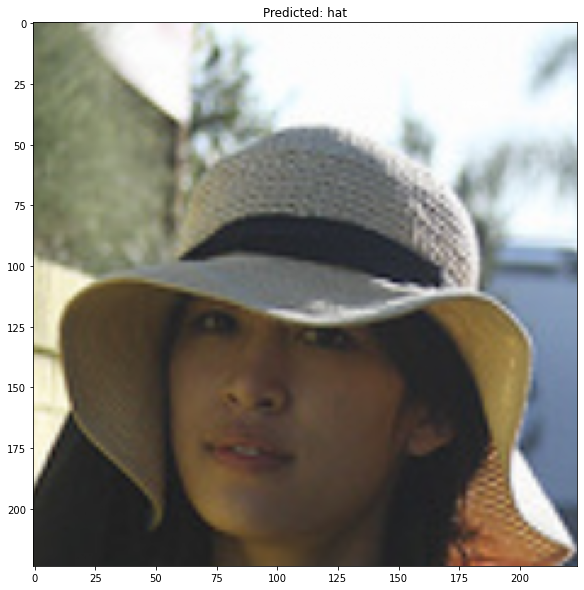

In [125]:
plt.imshow(vis_dataset[526][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[526].item()]))

In [126]:
plt.imshow(vis_dataset[715][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[715].item()]))

Text(0.5, 1.0, 'Predicted: belt')

Text(0.5, 1.0, 'Predicted: shoes')

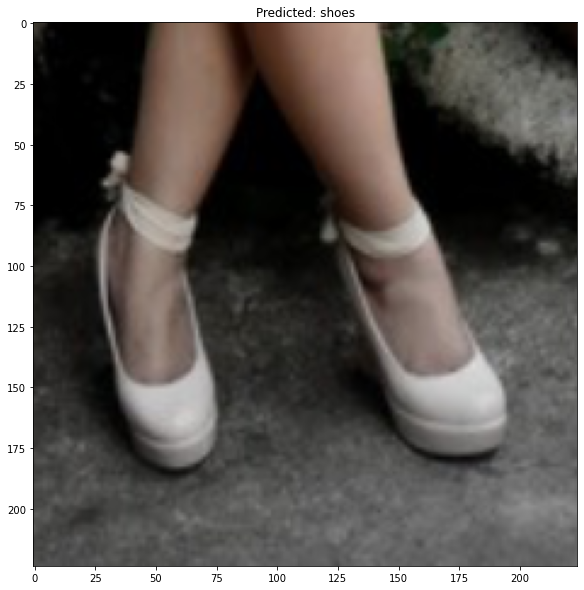

In [95]:
plt.imshow(vis_dataset[128][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[128].item()]))

In [94]:
plt.imshow(vis_dataset[129][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[129].item()]))

Text(0.5, 1.0, 'Predicted: shorts')

Text(0.5, 1.0, 'Predicted: glasses')

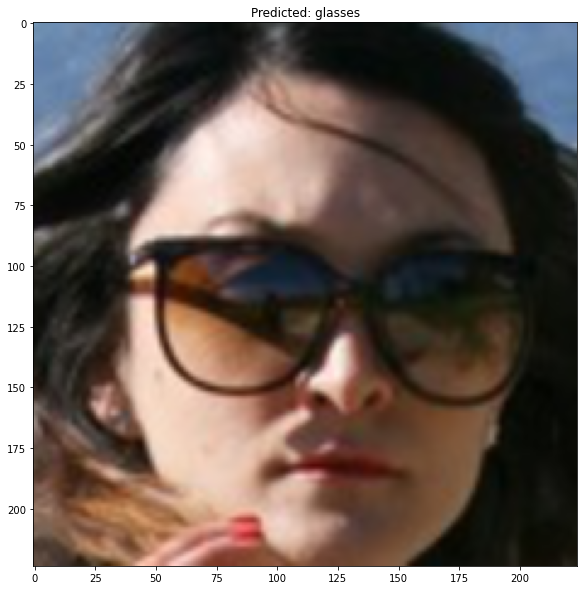

In [92]:
plt.imshow(vis_dataset[852][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[852].item()]))

Text(0.5, 1.0, 'Predicted: belt')

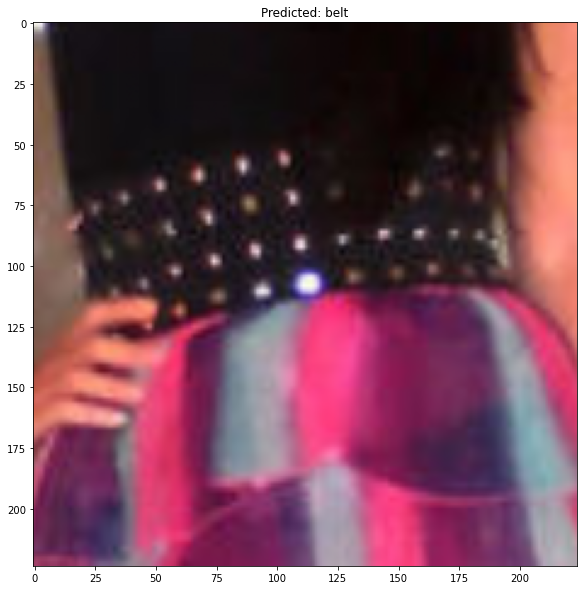

In [93]:
plt.imshow(vis_dataset[827][0].transpose(2,0))
plt.title('Predicted: '+ str(test_dataset.read_mapping()[predictions[827].item()]))

Text(0.5, 1.0, 'Predicted: belt')

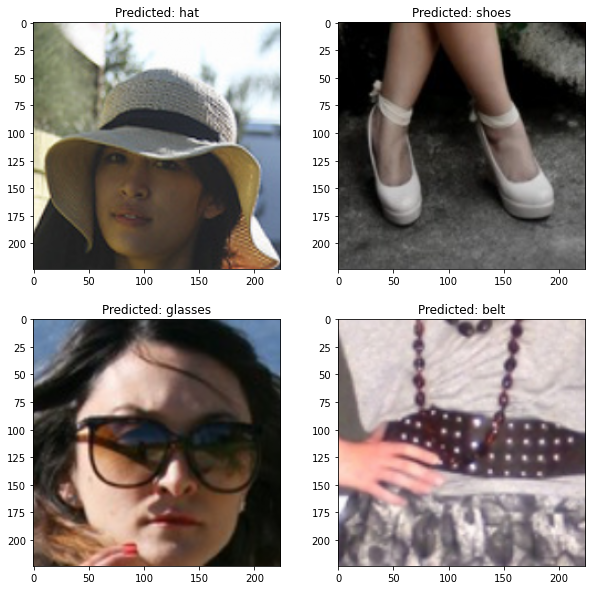

In [127]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(vis_dataset[526][0].transpose(2,0))
axs[0, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[526].item()]))
axs[0, 1].imshow(vis_dataset[128][0].transpose(2,0))
axs[0, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[128].item()]))
axs[1, 0].imshow(vis_dataset[852][0].transpose(2,0))
axs[1, 0].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[852].item()]))
axs[1, 1].imshow(vis_dataset[715][0].transpose(2,0))
axs[1, 1].set_title('Predicted: '+ str(test_dataset.read_mapping()[predictions[715].item()]))